In [6]:
"""
file: simple_autoencoder
Author: Petri Lamminaho (he base code can be found on the Keras blog)
Desc: Simple Kras Autoencoder
"""
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.datasets import mnist

In [7]:
encoding_dim = 32
input_image = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_image)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_image, decoded)
encoder = Model(input_image, encoded)
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [8]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.3605 - val_loss: 0.2704
Epoch 2/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2626 - val_loss: 0.2511
Epoch 3/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2405 - val_loss: 0.2274
Epoch 4/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.2194 - val_loss: 0.2092
Epoch 5/50
60000/60000 [==============================] - 7s 116us/step - loss: 0.2042 - val_loss: 0.1967
Epoch 6/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1935 - val_loss: 0.1875
Epoch 7/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1853 - val_loss: 0.1800
Epoch 8/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1784 - val_loss: 0.1737
Epoch 9/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1725 - val_loss: 0.1683
Epoc

In [10]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


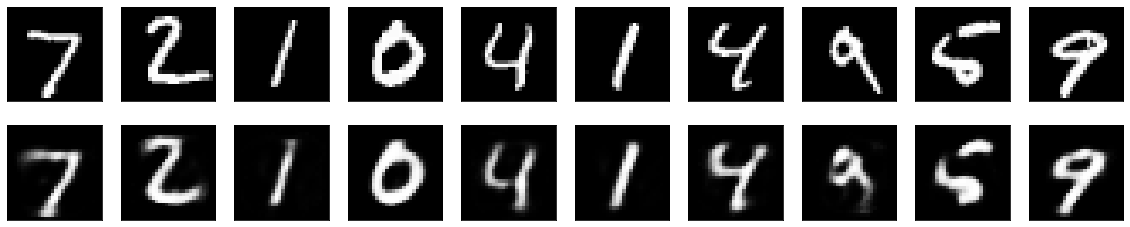

In [11]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()